Linear Regression: Masking Effect predicts classes: [1 2 3]
LDA: Correct Separation predicts classes: [1 2 3]


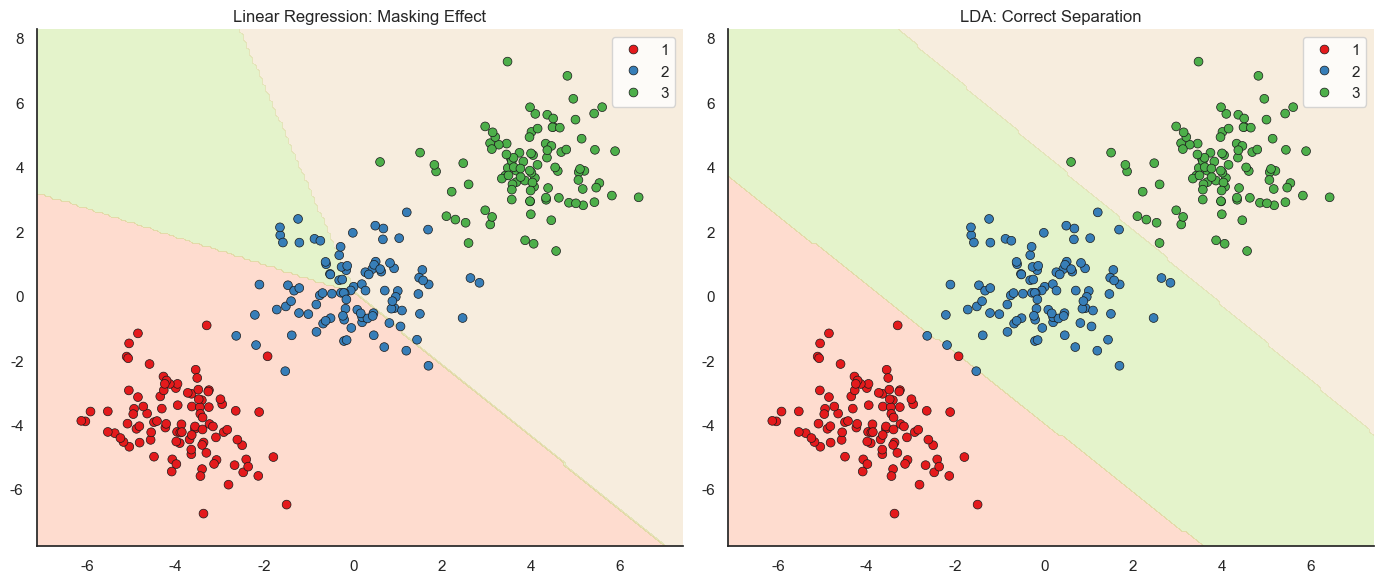

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

# Set aesthetic parameters
sns.set_theme(style="white")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# 1. Generate Data (Simulating the "Masking" effect where Class 2 is between 1 and 3)
np.random.seed(22)
N = 100
X1 = np.random.randn(N, 2) + np.array([-4, -4])
X2 = np.random.randn(N, 2) + np.array([0, 0])
X3 = np.random.randn(N, 2) + np.array([4, 4])

X = np.vstack((X1, X2, X3))
y = np.array([1]*N + [2]*N + [3]*N)

# 2. Model Fitting
# Regression on Indicator Matrix: Y = X @ B
enc = OneHotEncoder(sparse_output=False)
Y_onehot = enc.fit_transform(y.reshape(-1, 1))

reg = LinearRegression().fit(X, Y_onehot)
lda = LinearDiscriminantAnalysis().fit(X, y)

# 3. Enhanced Plotting Function
def plot_pretty_boundary(model, X, y, ax, title, is_regression=False):
    # 1. Create a very fine grid
    res = 200 # Increase resolution
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, res),
                         np.linspace(y_min, y_max, res))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # 2. Predict
    if is_regression:
        preds = model.predict(grid_points)
        Z = np.argmax(preds, axis=1) + 1
    else:
        Z = model.predict(grid_points)
    
    # Check if all 3 classes are actually predicted
    unique_preds = np.unique(Z)
    print(f"{title} predicts classes: {unique_preds}")
    
    Z = Z.reshape(xx.shape)
    
    # 3. Plot with discrete boundaries
    # 'Set1' or 'Paired' are good for discrete classes
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='Set2', levels=np.arange(0.5, 4.5, 1))
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', 
                    ax=ax, edgecolor='k', s=40, legend=True)
    
    ax.set_title(title, family='Arial')
    sns.despine()

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_pretty_boundary(reg, X, y, axes[0], "Linear Regression: Masking Effect", is_regression=True)
plot_pretty_boundary(lda, X, y, axes[1], "LDA: Correct Separation", is_regression=False)

plt.tight_layout()
plt.savefig("masking_effect_comparison.pdf")